> # 手写版 KNN 教程 

https://www.kaggle.com/c/digit-recognizer


In [2]:
import numpy as np # 数组常用库
import pandas as pd # 读入csv常用库
import matplotlib.pyplot as plt # 画图常用库

从 `../input/train.csv` and `../input/test.csv` 文件里面读入 numpy arrays.

导入数据后打印shape查看是否数据是否完整

导入数据差不多10秒

In [3]:

data_dir = "../input/"

# load csv files to numpy arrays
def load_data(data_dir, train_row):
    train = pd.read_csv(data_dir + "train.csv")
    print(train.shape)
    X_train = train.values[0:train_row,1:] # 取下标为1-784的列（pixel0 - pixel783）
    y_train = train.values[0:train_row,0] # 取下标为0的列 (label)
    
    
    Pred_test = pd.read_csv(data_dir + "test.csv").values
    return X_train, y_train, Pred_test

train_row = 5000 # 如果想取全部数据，设置为最大值 42000
Origin_X_train, Origin_y_train, Origin_y_test = load_data(data_dir, train_row)



(42000, 785)


In [4]:
print(Origin_X_train.shape, Origin_y_train.shape, Origin_y_test.shape)

(5000, 784) (5000,) (28000, 784)


用图像展示一下数据集是什么样子的

7


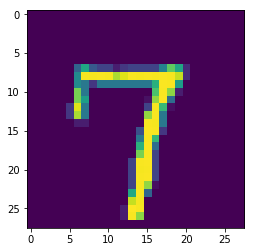

In [5]:
import matplotlib
import matplotlib.pyplot as plt
row = 6
# 展示第i个图
# print (X_train[row].reshape((28, 28)))

print (Origin_y_train[row])

plt.imshow(Origin_X_train[row].reshape((28, 28)))
plt.show()


展示部分数据看看图片是什么样子的。（有兴趣的同学可以自己看）

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


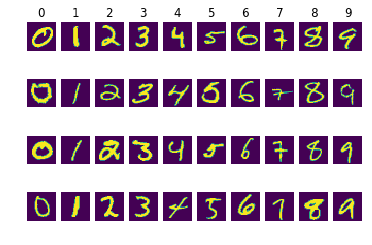

In [6]:
classes = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
rows = 4

print(classes)
for y, cls in enumerate(classes):
    idxs = np.nonzero([i == y for i in Origin_y_train])
    idxs = np.random.choice(idxs[0], rows)
    for i , idx in enumerate(idxs):
        plt_idx = i * len(classes) + y + 1
        plt.subplot(rows, len(classes), plt_idx)
        plt.imshow(Origin_X_train[idx].reshape((28, 28)))
        plt.axis("off")
        if i == 0:
            plt.title(cls)
        

plt.show()

把原本的训练数据拆分成为20%验证集（8400个），80%训练集（33600个）

怎么样2/8分

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_vali, y_train, y_vali = train_test_split(Origin_X_train,
                                                   Origin_y_train,
                                                   test_size = 0.2,
                                                   random_state = 0)
# 解释一下random 那个随机函数随机种子是什么。 随机种子一样，那么结果是一样的。

print(X_train.shape, X_vali.shape, y_train.shape, y_vali.shape)

(4000, 784) (1000, 784) (4000,) (1000,)


In [8]:
class knn():
    def __init__(self):
        pass

    def train(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X, num, k=3):
        dataSet = X_train
        labels = y_train
      
        dataSetSize = dataSet.shape[0]
        
        # np.tile: 重复数组若干次
        # a = np.array([0, 1, 2])
        # np.tile(a, (2, 2))
        # array([[0, 1, 2, 0, 1, 2],
        #        [0, 1, 2, 0, 1, 2]])

        diffMat = np.tile(X,(dataSetSize,1)) - dataSet
        sqDiffMat = diffMat**2
        sumDiffMat = sqDiffMat.sum(axis=1)
        distances = sumDiffMat**0.5
        sortedDistances = distances.argsort()
        
        # np.argsort: return idx of elements after sorting in ascending order
        # x = np.array([3, 1, 2])
        # np.argsort(x)
        # array([1, 2, 0])
        
        classCount = {}
        
        for i in range(k):
            vote = labels[sortedDistances[i]]
            classCount[vote] = classCount.get(vote,0) + 1
        max = 0
        ans = 0
        for k,v in classCount.items():
            if(v>max):
                ans = k
                max = v
#         print("test #"+ str(num+1) + " prediction is " + str(ans)
        return(ans)


下面进行KNN模型训练


In [10]:
from sklearn.metrics import accuracy_score

classifier = knn()
classifier.train(X_train, y_train)

max = 0
ans_k = 0

for k in range(1, 4):
    print ('when k = ' + str(k) + ', start training')
    predictions = np.zeros(len(y_vali))
    for i in range(X_vali.shape[0]):
        if i % 500 == 0:
            print("Computing  " + str(i+1) + "/" + str(int(len(X_vali))) + "...")
        output = classifier.predict(X_vali[i], i, k)
        predictions[i] = output
    
#     print(k, predictions)
#     predictions.shape
    accuracy = accuracy_score(y_vali, predictions)
    print ('k = '+ str(k) , ' accuracy =' + str(accuracy))
    if max < accuracy:
        ans_k = k
        max = accuracy

when k = 1, start training
Computing  1/1000...
Computing  501/1000...
k = 1  accuracy =0.919
when k = 2, start training
Computing  1/1000...
Computing  501/1000...
k = 2  accuracy =0.919
when k = 3, start training
Computing  1/1000...
Computing  501/1000...
k = 3  accuracy =0.925


In [ ]:
print(y_vali)
print(predictions)

In [11]:
k = 3
Origin_y_test = Origin_y_test[:300] # remove this line for full test
predictions = np.zeros(Origin_y_test.shape[0])
for i in range(Origin_y_test.shape[0]):
    if i % 100 ==0:
        print("Computing  " + str(i+1) + "/" + str(int(len(Origin_y_test))) + "...")
    predictions[i] = classifier.predict(Origin_y_test[i], i, k)


Computing  1/300...
Computing  101/300...
Computing  201/300...


3.0


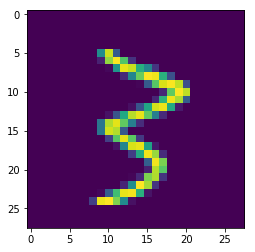

In [12]:
# 验证一下结果
print (predictions[105])
plt.imshow(Origin_y_test[105].reshape((28, 28)))

In [13]:
print(len(predictions))
out_file = open("predictions.csv", "w")
out_file.write("ImageId,Label\n")
for i in range(len(predictions)):
    out_file.write(str(i+1) + "," + str(int(predictions[i])) + "\n")
out_file.close()

300
